In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('E:/Z-Machine Learning\My Work/DataSets/BMW Pricing Challenge/bmw_pricing_challenge.csv')
y = df['price']
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [2]:
ind = 0
for i in df['fuel']:
    if(df['fuel'][ind] == "diesel"):
        df['fuel'][ind] = 1
    else:
        df['fuel'][ind] = 2
    ind = ind + 1
ind = 0 
for i in df['car_type']:
    if(df['car_type'][ind] == 'convertible'):
        df['car_type'][ind] = 1
    if(df['car_type'][ind] == 'coupe'):
        df['car_type'][ind] = 2
    if(df['car_type'][ind] == 'estate'):
        df['car_type'][ind] = 3
    if(df['car_type'][ind] == 'hatchback'):
        df['car_type'][ind] = 4
    if(df['car_type'][ind] == 'sedan'):
        df['car_type'][ind] = 5
    if(df['car_type'][ind] == 'subcompact'):
        df['car_type'][ind] = 6
    if(df['car_type'][ind] == 'suv'):
        df['car_type'][ind] = 7
    if(df['car_type'][ind] == 'van'):
        df['car_type'][ind] = 8
    ind = ind + 1

In [3]:
col = ['maker_key','model_key','sold_at','registration_date','paint_color','price']
df = df.drop(col,axis = 1)

In [4]:
df

,mileage,engine_power,fuel,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,140411,100,1,1,True,True,False,False,True,True,True,False
1,13929,317,2,1,True,True,False,False,False,True,True,True
2,183297,120,1,1,False,False,False,False,True,False,True,False
3,128035,135,1,1,True,True,False,False,True,True,True,True
4,97097,160,1,1,True,True,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4838,39743,110,1,8,False,True,False,False,False,False,True,False
4839,49832,100,1,8,False,True,False,False,False,False,True,True
4840,19633,110,1,8,False,True,False,False,False,False,True,True
4841,27920,110,1,8,True,True,False,False,False,False,True,True


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#X is your data variable for the training data
scaler.fit(df)
df = scaler.transform(df)


In [6]:
import numpy as np
df = np.array(df)

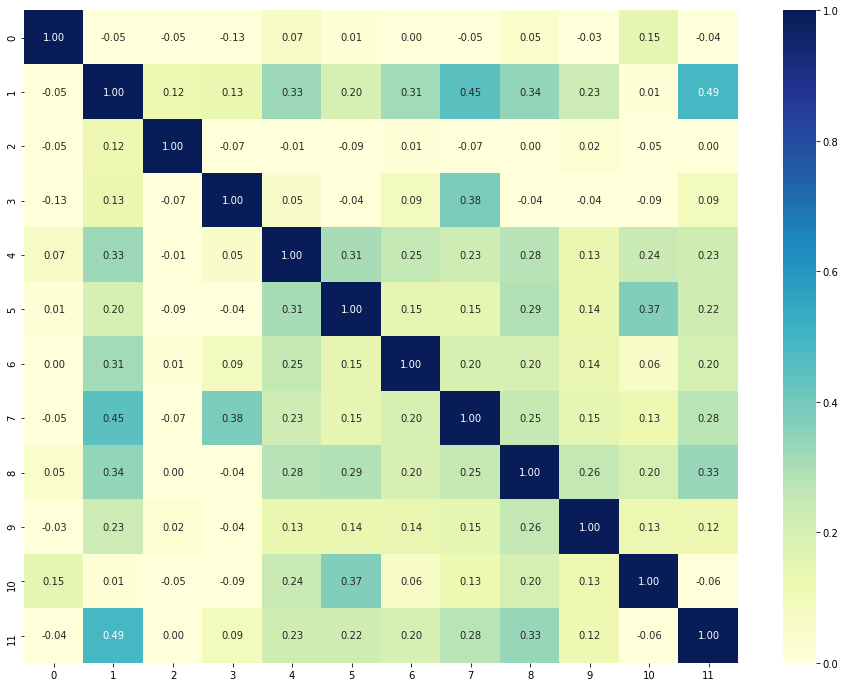

In [7]:
#Make sure to scale the data first (preprocessing) such as the MinMaxScaler
#dataframe is your data variable, leave the rest as default 
#you can change the 16,12 values for the grid size

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#you can change the cmap to cmap='RdYlGn' it will just make a color difference that's all
plt.figure(figsize=(16, 12))
sns.heatmap(pd.DataFrame(df).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);


In [8]:
import sklearn
from sklearn import linear_model



x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df,y,test_size = 0.2)
import random

c = list(zip(x_train, y_train))
random.shuffle(c)
x_train, y_train = zip(*c)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:

hist = linear.fit(x_train, y_train)

In [10]:
pred = hist.predict(x_test)

In [11]:
ind = 0
for i in pred:
    pred[ind] = int(pred[ind])
    ind = ind + 1
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df2

,Actual,Predicted
2495,8600,9583.0
1666,14300,13087.0
892,13800,13488.0
3664,9400,9485.0
3269,31300,30050.0
...,...,...
950,17800,14970.0
73,28000,30117.0
1745,11500,11885.0
3684,14800,15123.0


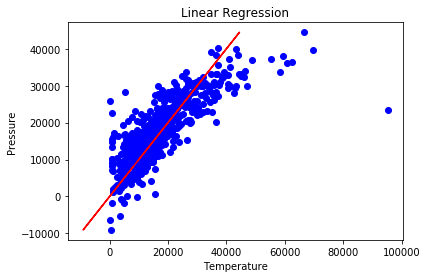

In [12]:
plt.scatter(y_test, pred, color = 'blue') 
  
plt.plot(pred, pred, color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x_train) 
X2_poly = poly.fit_transform(x_test) 
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
pred2 = lin2.predict(X2_poly)

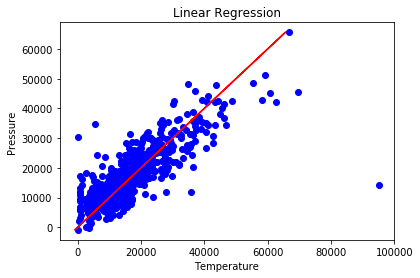

In [14]:
plt.scatter(y_test, pred2, color = 'blue') 
  
plt.plot(pred2, pred2, color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

In [15]:
ind = 0
for i in pred:
    pred2[ind] = int(pred2[ind])
    ind = ind + 1
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': pred2})
df2

,Actual,Predicted
2495,8600,8703.0
1666,14300,13013.0
892,13800,13109.0
3664,9400,10629.0
3269,31300,36117.0
...,...,...
950,17800,12245.0
73,28000,11749.0
1745,11500,12453.0
3684,14800,11685.0
